In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [51]:
url = "https://eschome.net/databaseoutput431.php"  # replace with correct PHP script

# Example payloads
years = ["2025F", 
    "2024F",
    "2023F",
    "2022F", "2022SF2", "2022SF1",
    "2021F", "2021SF2", "2021SF1",
    "2019F", "2019SF2", "2019SF1",
    "2018F", "2018SF2", "2018SF1",
    "2017F", "2017SF2", "2017SF1",
    "2016F", "2016SF2", "2016SF1"
]
headers = {"User-Agent": "Mozilla/5.0"}

columns = ["Place", "Place_Jury", "Place_Televote", "Place_Diff",
           "Points", "Points_Jury", "Points_Televote", "Points_Diff",
           "Flag", "Country", "Performer", "Song", "Qualification",
           "Composer", "Writer", "Year"]

df = pd.DataFrame(columns=columns)


In [52]:
for year in years:
    payload = {
        "jahr": year,
        "details": 0   # match the form checkbox for "with details"
    }
    
    r = requests.post(url, data=payload, headers=headers)
    html = r.text
    
    soup = BeautifulSoup(html, "lxml")
    table = soup.find("table", id="tabelle1")
    
    if not table:
        continue

    trs = table.find_all("tr")
    i = 0
    rows = []

    while i < len(trs):
        main_cells = trs[i].find_all("td")
        main_data = [c.get_text(strip=True) for c in main_cells]

        # Initialize detail fields
        composer = ""
        writer = ""
        qualification = ""
        
        # Look ahead: next row might contain composer/writer
        if i + 1 < len(trs):
            next_cells = trs[i + 1].find_all("td")
            next_texts = [c.get_text(strip=True) for c in next_cells]

            # Detect detail row: first several cells empty
            if all(x == "" for x in next_texts[:10]):
                composer = next_texts[10] if len(next_texts) > 10 else ""
                writer = next_texts[11] if len(next_texts) > 11 else ""
                i += 1  # skip detail row
                
        if main_data:
            row = []
            if len(main_data) < 13:
                # Combine everything + year
                row = main_data + [qualification, composer, writer, year]
            elif len(main_data) >= 13:
                row = main_data + [composer, writer, year]

            rows.append(row)

        i += 1

    # Decide which columns to use
    if len(rows[0]) == len(columns):
        df = pd.concat([df, pd.DataFrame(rows, columns=columns)], ignore_index=True)



In [53]:
print(df.head())


  Place Place_Jury Place_Televote Place_Diff Points Points_Jury  \
0     1          1              4          3    436         258   
1     2         15              1         14    357          60   
2     3          9              2          7    356          98   
3     4          6              3          3    321         126   
4     5          4             10          6    256         159   

  Points_Televote Points_Diff Flag  Country      Performer  \
0             178          80       Austria             JJ   
1             297         237        Israel  Yuval Raphael   
2             258         160       Estonia     Tommy Cash   
3             195          69        Sweden            KAJ   
4              97          62         Italy    Lucio Corsi   

                    Song Qualification  \
0            Wasted Love                 
1      New Day Will Rise                 
2     Espresso Macchiato                 
3        Bara Bada Bastu                 
4  Volevo Esse

In [ ]:
df.to_csv("eurovision_results.csv", index=False)

In [66]:
import matplotlib.pyplot as plt

In [61]:
df_results = pd.read_csv("./eurovision_results.csv")

In [56]:
df_tv_2016 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2016_televote_results.csv")
df_tv_2017 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2017_televote_results.csv")
df_tv_2018 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2018_televote_results.csv")
df_tv_2019 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2019_televote_results.csv")
df_tv_2021 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2021_televote_results.csv")
df_tv_2022 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2022_televote_results.csv")
df_tv_2023 = pd.read_csv("./Kaggle_Dataset/Final_Results/Televote/2023_televote_results.csv")

In [57]:
df_jr_2016 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2016_jury_results.csv")
df_jr_2017 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2017_jury_results.csv")
df_jr_2018 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2018_jury_results.csv")
df_jr_2019 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2019_jury_results.csv")
df_jr_2021 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2021_jury_results.csv")
df_jr_2022 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2022_jury_results.csv")
df_jr_2023 = pd.read_csv("./Kaggle_Dataset/Final_Results/Jury/2023_jury_results.csv")

In [59]:
df_pl_2016 = pd.read_csv("./Kaggle_Dataset/Polls/2016_poll_results.csv")
df_pl_2017 = pd.read_csv("./Kaggle_Dataset/Polls/2017_poll_results.csv")
df_pl_2018 = pd.read_csv("./Kaggle_Dataset/Polls/2018_poll_results.csv")
df_pl_2019 = pd.read_csv("./Kaggle_Dataset/Polls/2019_poll_results.csv")
df_pl_2021 = pd.read_csv("./Kaggle_Dataset/Polls/2021_poll_results.csv")
df_pl_2022 = pd.read_csv("./Kaggle_Dataset/Polls/2022_poll_results.csv")
df_pl_2023 = pd.read_csv("./Kaggle_Dataset/Polls/2023_poll_results.csv")

In [63]:
df_results[df_results["Year"]=="2022F"].head()

,Place,Place_Jury,Place_Televote,Place_Diff,Points,Points_Jury,Points_Televote,Points_Diff,Flag,Country,Performer,Song,Qualification,Composer,Writer,Year
77,1,4,1,3,631,192,439,247,NaN,Ukraine,Kalush Orchestra,Stefania,NaN,"Ihor Didenchuk, Tymofii Muzychuk, Vitalii Duzhyk","Ivan Klymenko, Oleh Psiuk",2022F
78,2,1,5,4,466,283,183,100,NaN,United Kingdom,Sam Ryder,SPACE MAN,NaN,"Sam Ryder, Amy Wadge, Max Wolfgang","Sam Ryder, Amy Wadge, Max Wolfgang",2022F
79,3,3,3,0,459,231,228,3,NaN,Spain,Chanel,SloMo,NaN,"Arjen Thonen, Ibere Fortes, Keith Harris, Lero...","Ibere Fortes, Leroy Sánchez, Maggie Szabo",2022F
80,4,2,6,4,438,258,180,78,NaN,Sweden,Cornelia Jakobs,Hold Me Closer,NaN,"Cornelia Jakobs, David Zandén, Isa Molin","Cornelia Jakobs, David Zandén, Isa Molin",2022F
81,5,11,4,7,312,87,225,138,NaN,Serbia,Konstrakta,In Corpore Sano,NaN,"Ana Đurić, Milovan Bošković",Ana Đurić,2022F


In [64]:
df_jr_2016.head()

,Contestant,Total score,Jury score,Televoting score,Austria,Iceland,Azerbaijan,San Marino,Czech Republic,Ireland,...,Macedonia,Albania,Estonia,Ukraine,Italy,Poland,Slovenia,Hungary,Montenegro,Sweden
0,Belgium,181,130,51,5.0,3.0,NaN,NaN,2.0,12.0,...,4.0,NaN,NaN,10.0,NaN,NaN,8.0,NaN,3.0,NaN
1,Czech Republic,41,41,0,4.0,5.0,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,2.0,NaN,3.0
2,Netherlands,153,114,39,NaN,12.0,NaN,4.0,7.0,8.0,...,2.0,NaN,6.0,NaN,4.0,NaN,1.0,6.0,NaN,5.0
3,Azerbaijan,117,44,73,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,7.0,NaN,NaN,NaN,7.0,NaN,10.0
4,Hungary,108,52,56,NaN,NaN,4.0,2.0,10.0,NaN,...,NaN,1.0,NaN,2.0,NaN,NaN,3.0,NaN,7.0,NaN


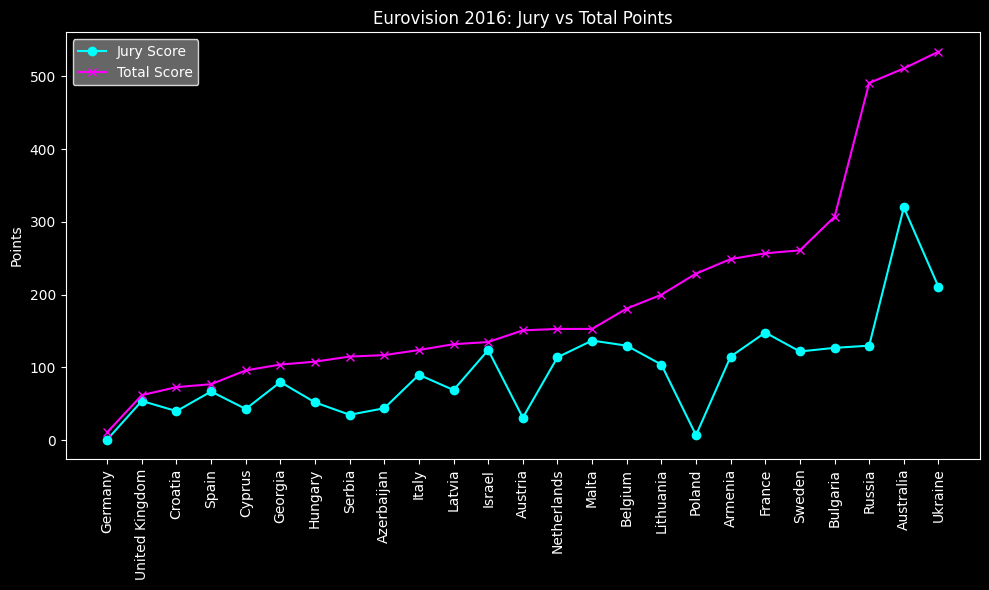

In [76]:
df_results_temp = df_results[df_results["Year"]=="2016F"]
df_jr_2016_temp = df_jr_2016.rename(columns={"Contestant": "Country"})

df_merge = pd.merge(
    df_jr_2016_temp[['Country', 'Jury score']], 
    df_results_temp[['Country', 'Points']], 
    on='Country', 
    how='inner'
)

df_merge = df_merge.sort_values(by='Points')

plt.figure(figsize=(10,6), facecolor='black')
ax = plt.gca()  # get current axes
ax.set_facecolor('black')  # plot area background

# Example plot
ax.plot(df_merge['Country'], df_merge['Jury score'], marker='o', color='cyan', label='Jury Score')
ax.plot(df_merge['Country'], df_merge['Points'], marker='x', color='magenta', label='Total Score')

ax.set_xticks(range(len(df_merge['Country'])))
ax.set_xticklabels(df_merge['Country'], rotation=90, color='white')
ax.tick_params(axis='x', colors='white')
ax.set_ylabel("Points", color='white')
ax.tick_params(axis='y', colors='white')
ax.set_title("Eurovision 2016: Jury vs Total Points", color='white')

for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.legend(facecolor='gray', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()